In [1]:
from main import *

# toy example

train_sub = [1]
train_x0, train_y0 = make_train_dataset(train_sub, 0)
score_model0 = train_scorenet(train_x0, train_y0)

/home/junyeobe/.local/lib/python3.9/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.13) or chardet (5.1.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "
  0%|                                                                                                                                                                                                                               | 0/500 [00:00<?, ?it/s]/home/junyeobe/augment/train_scorenet.py:149: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t = torch.tensor(t, device="cuda")
Score model Average Loss: 43649.452257: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [2]:
batch_size = 1
samples0 = sampling(score_model0, sample_batch_size=batch_size)

generated_signal0 = return_to_signal(samples0)

/home/junyeobe/augment/train_scorenet.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(sigma**t, device="cuda")


Number of function evaluations: 188


/home/junyeobe/augment/main.py:187: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at ../aten/src/ATen/native/Copy.cpp:276.)
  generated_stft_imag[idx] = np.multiply(imag, complex(0,1))


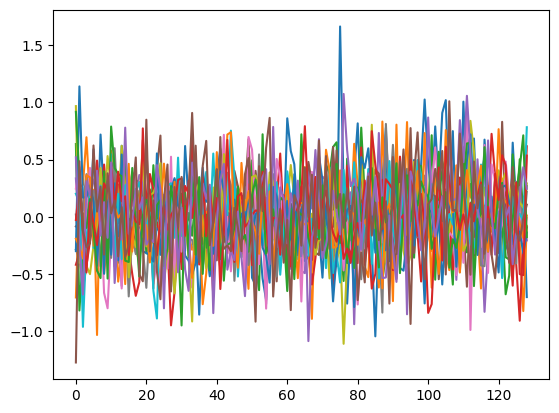

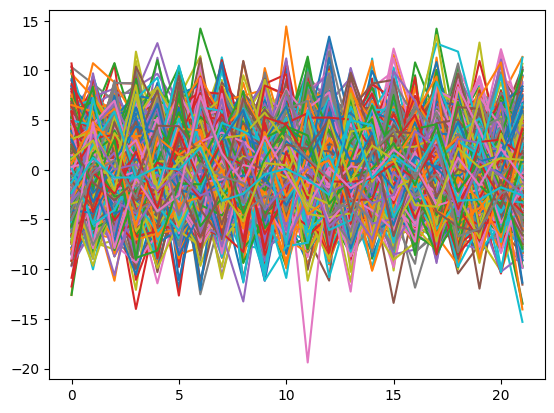

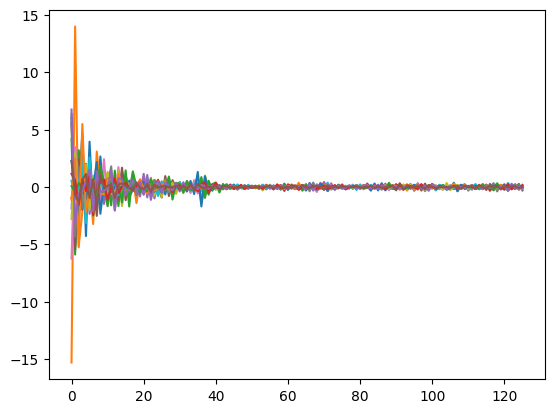

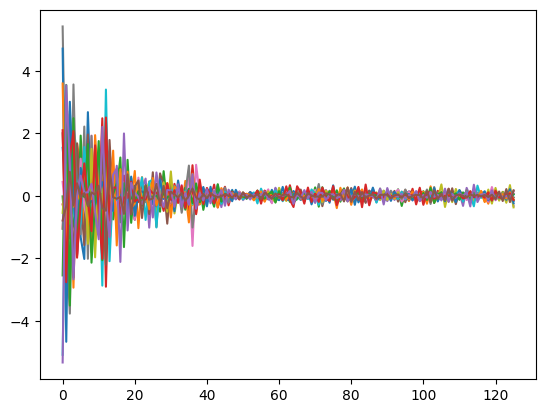

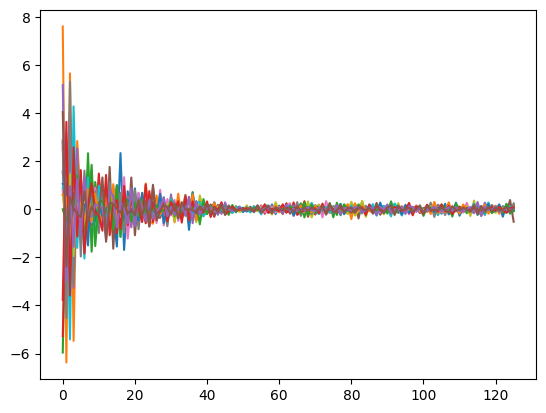

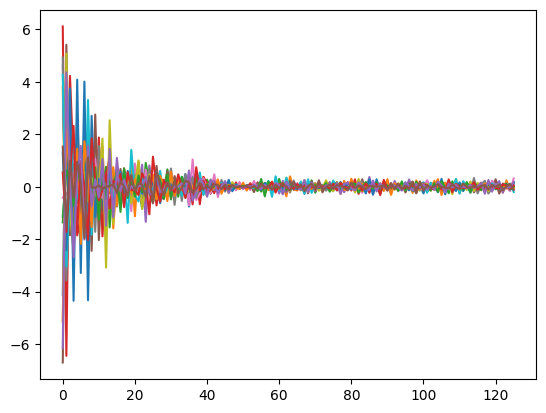

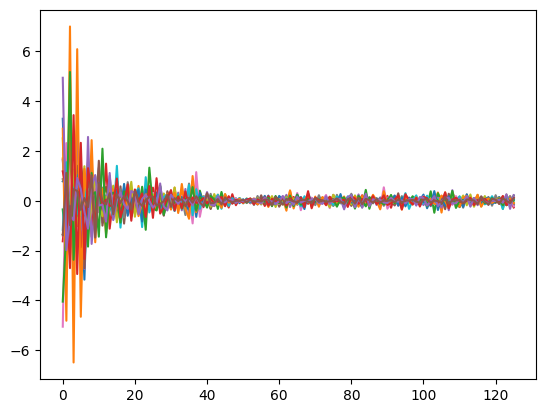

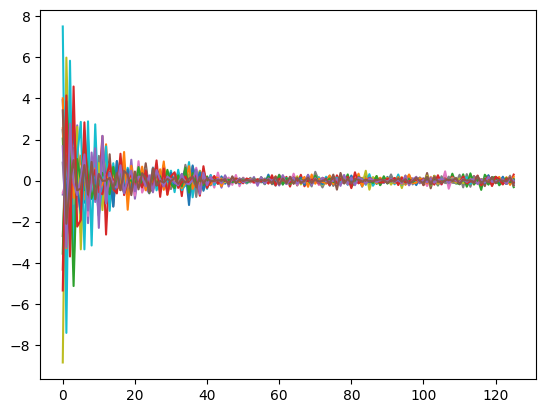

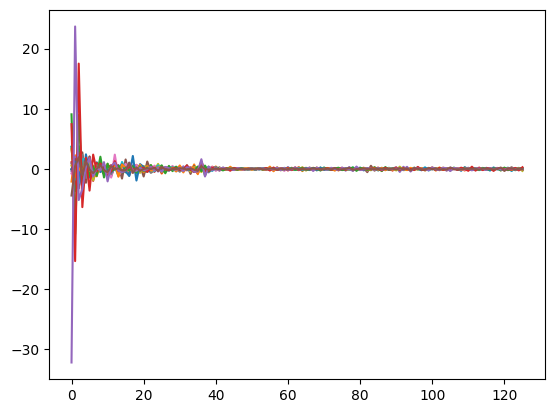

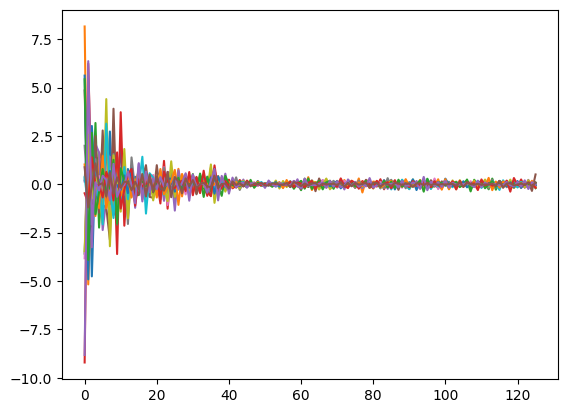

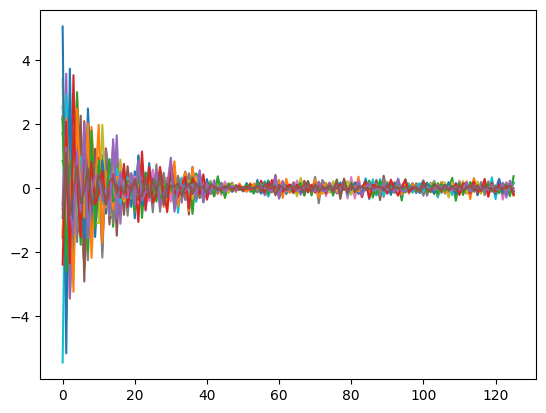

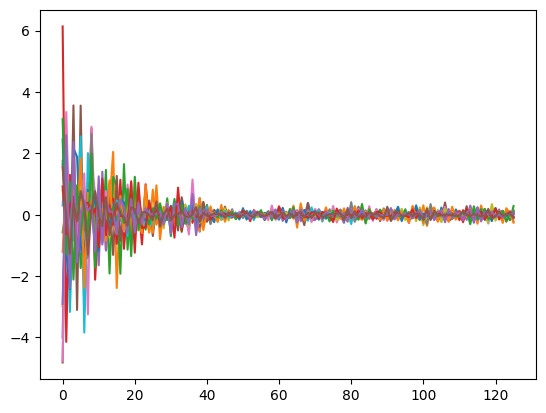

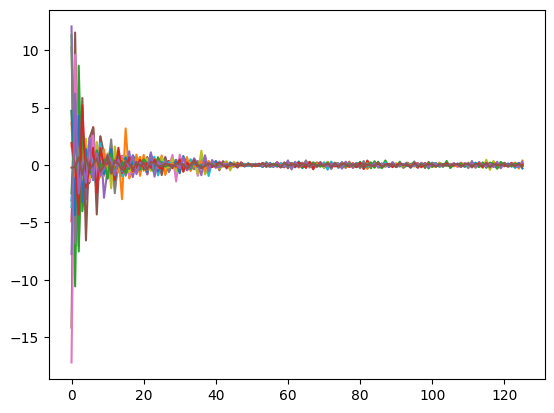

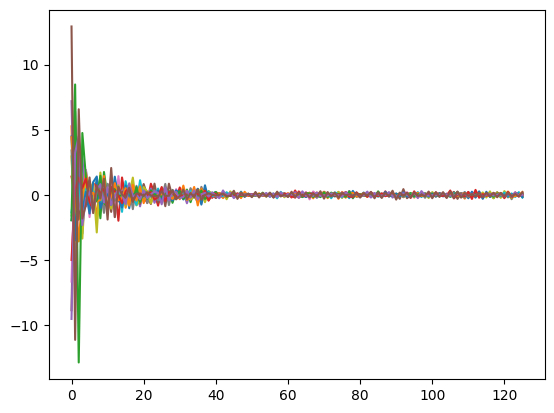

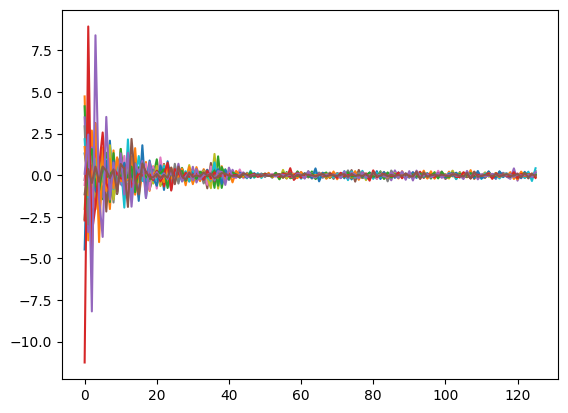

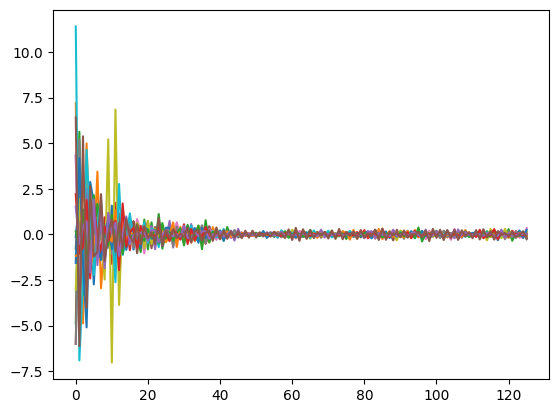

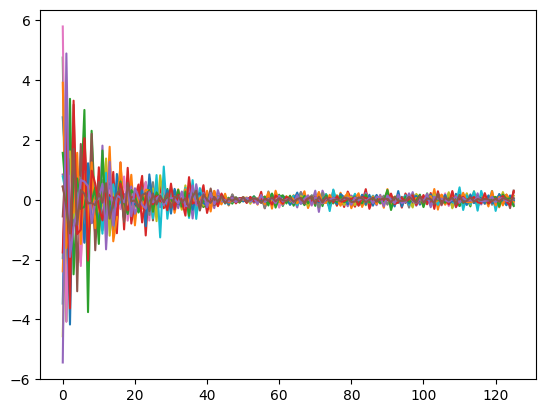

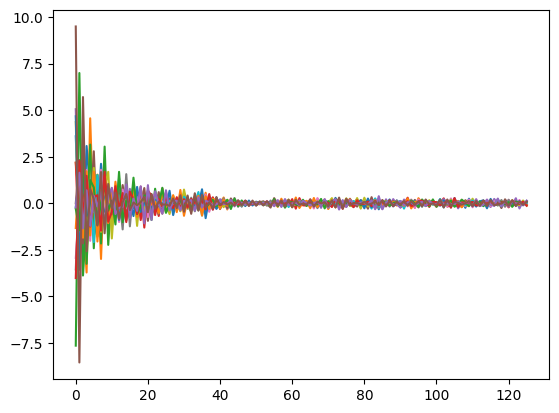

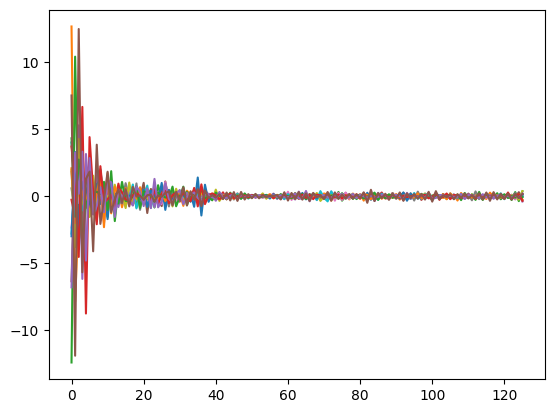

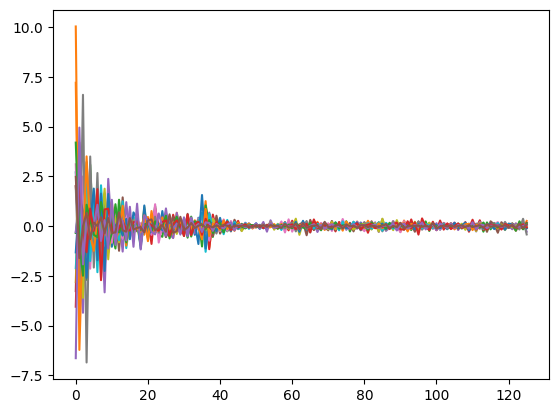

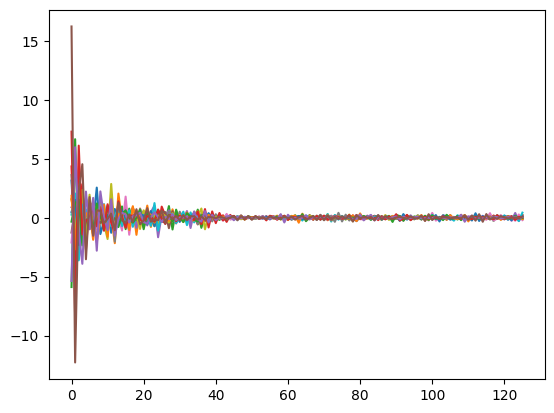

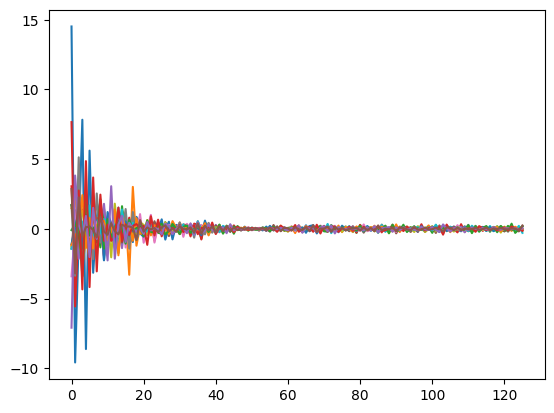

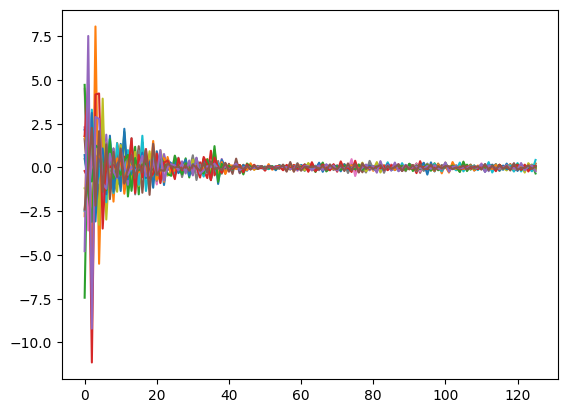

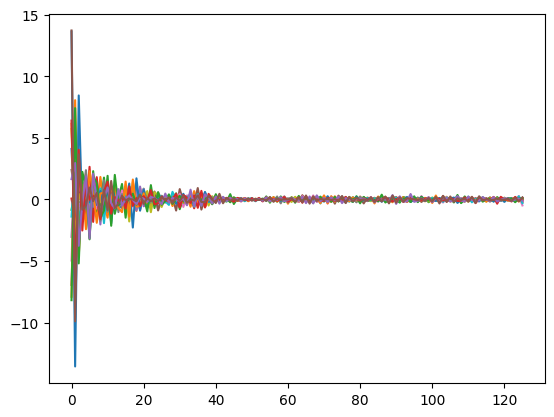

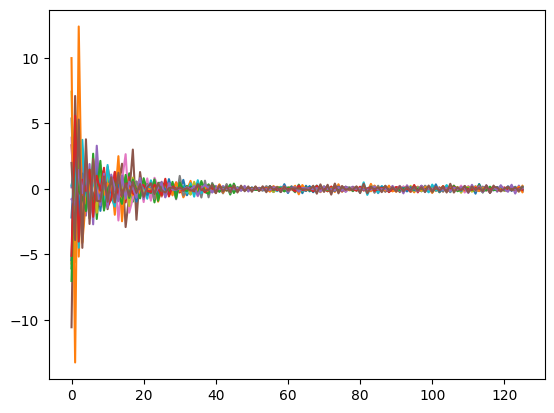

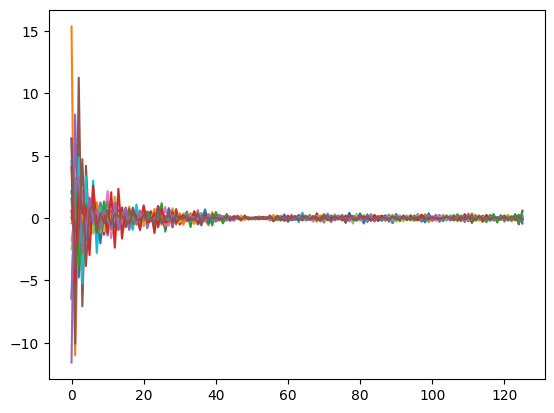

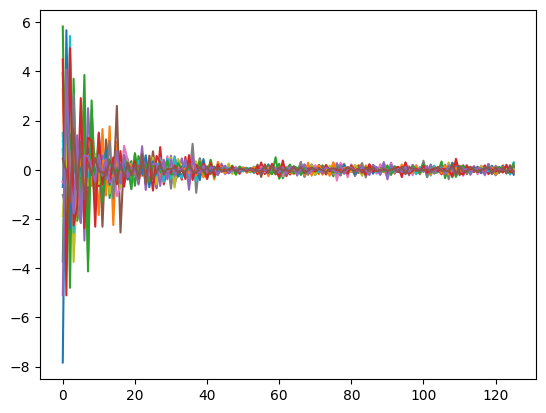

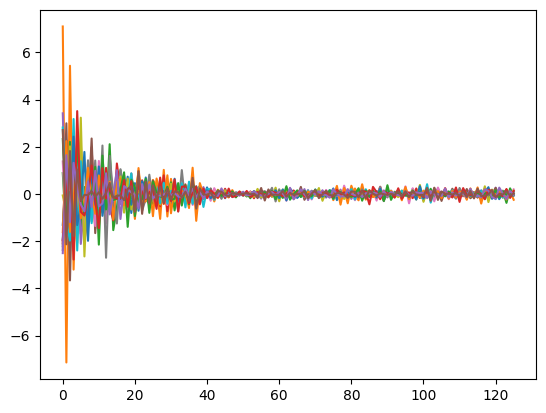

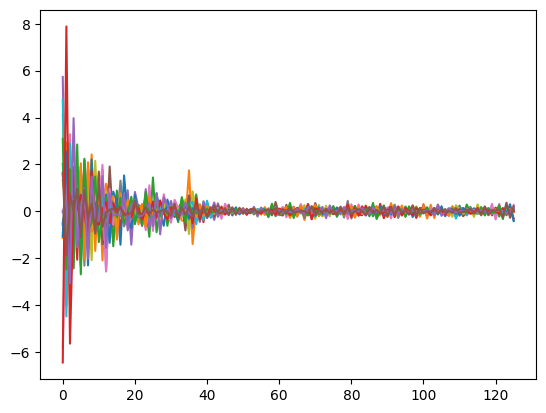

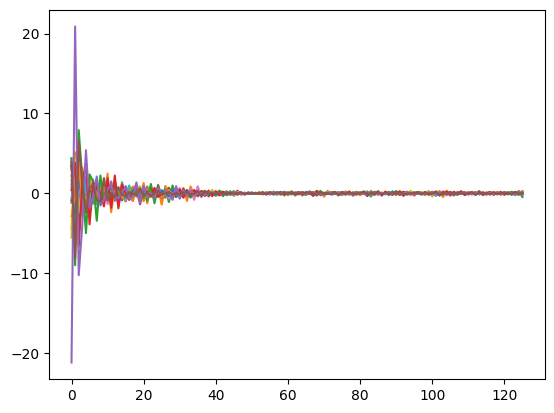

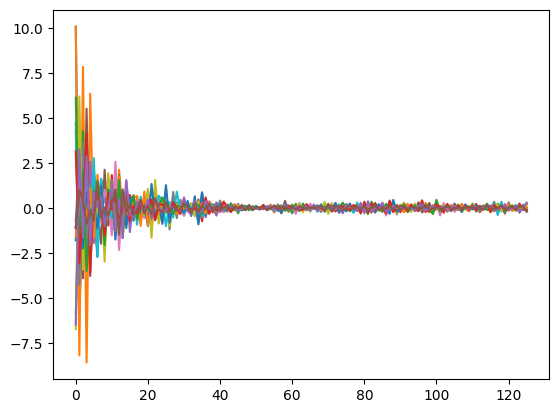

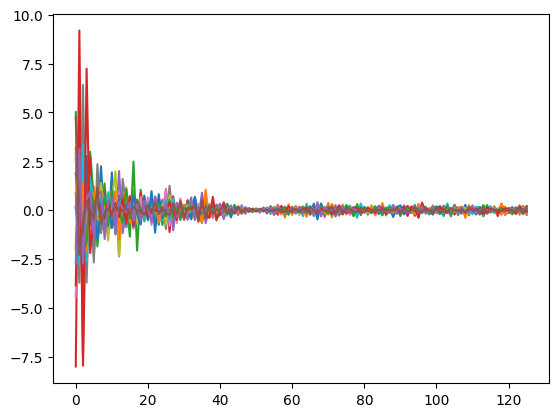

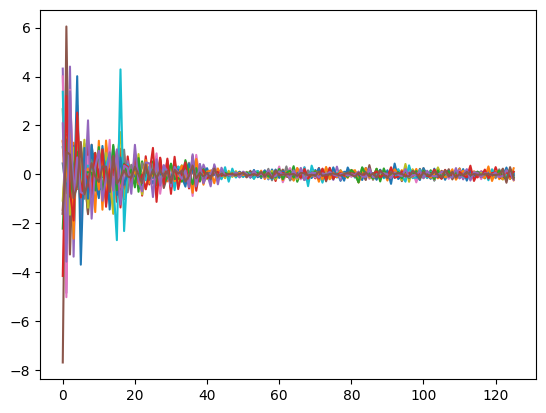

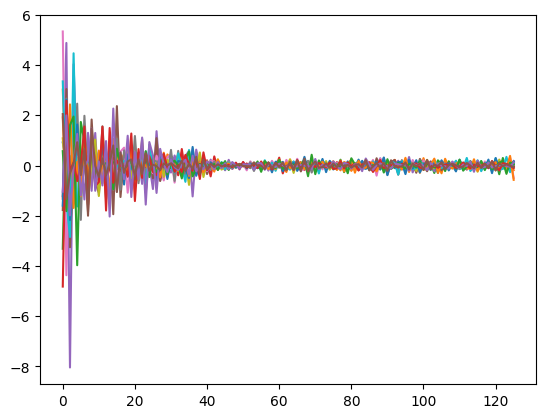

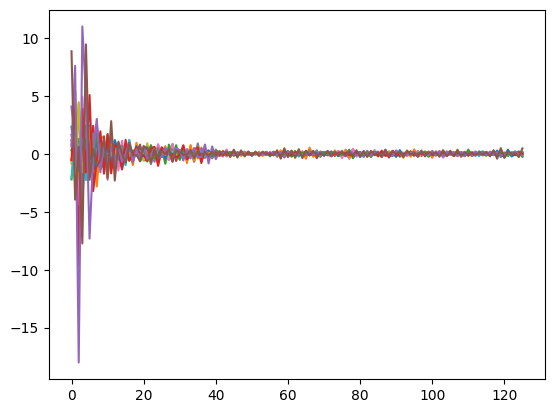

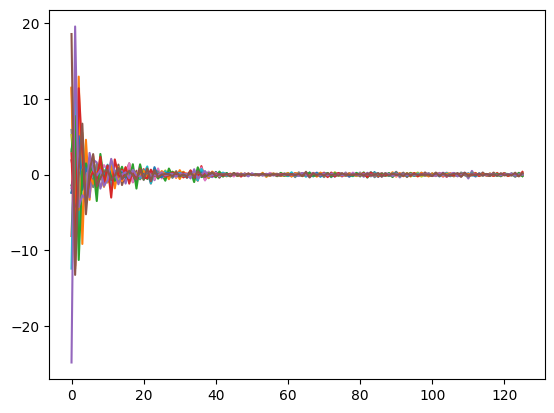

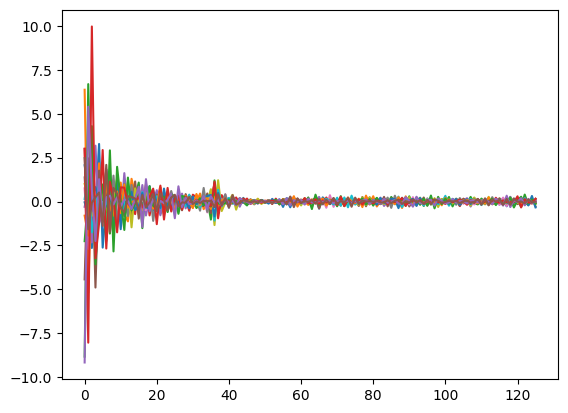

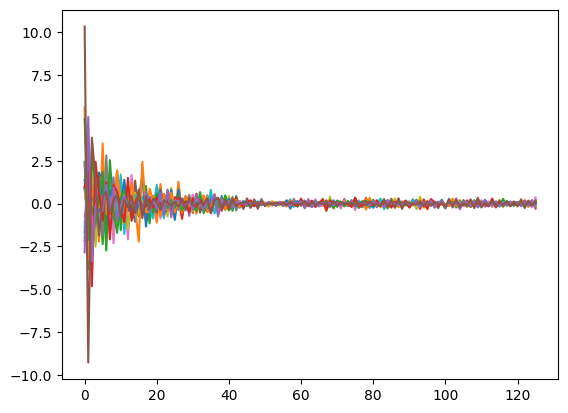

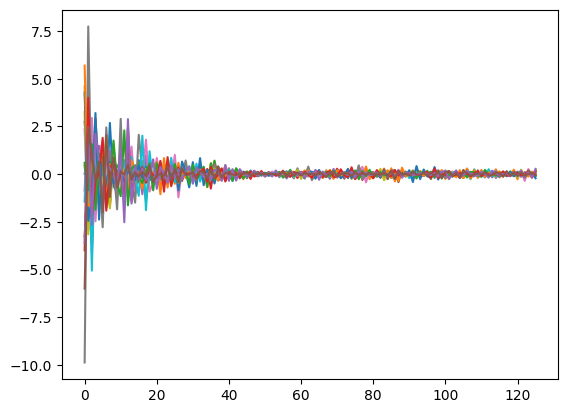

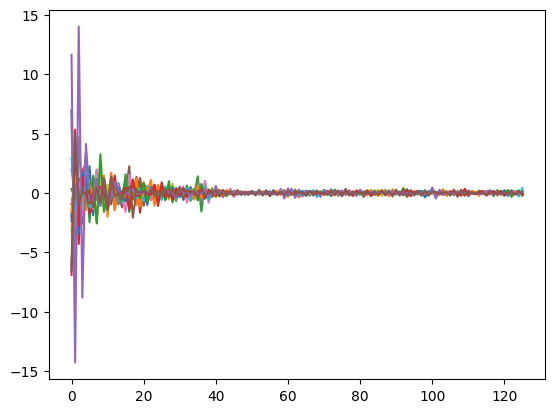

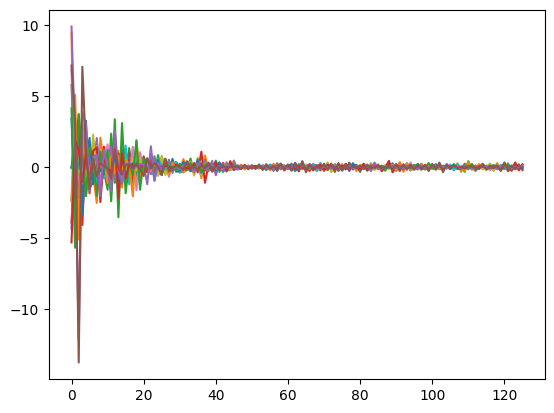

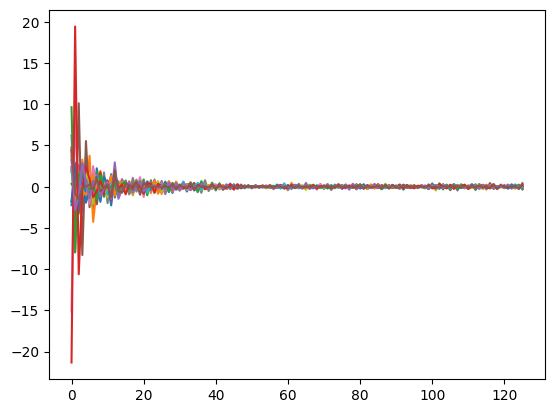

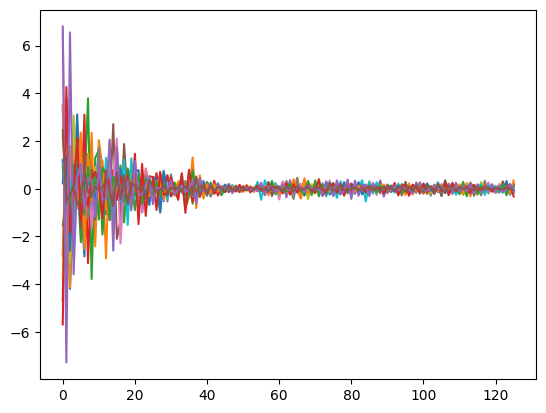

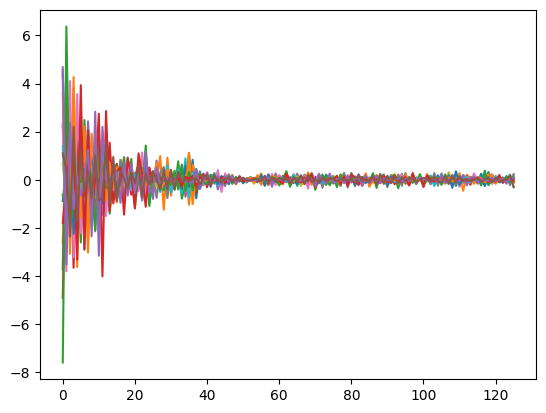

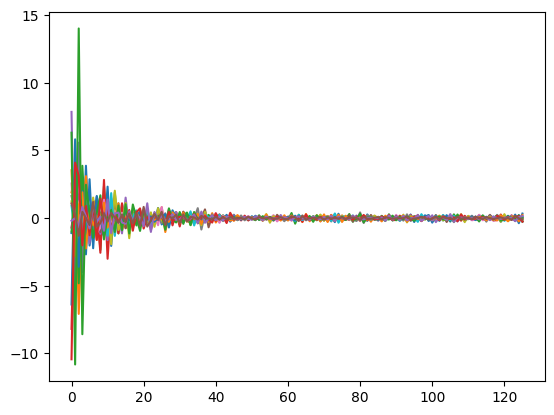

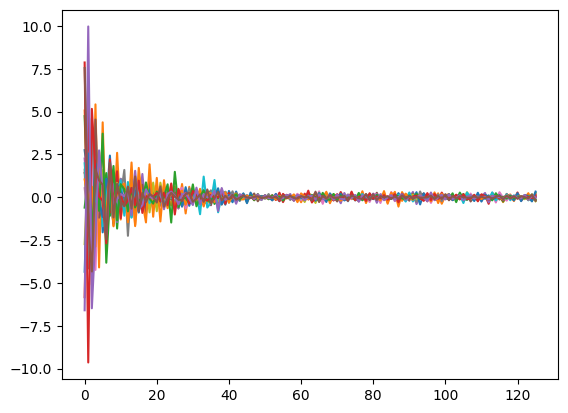

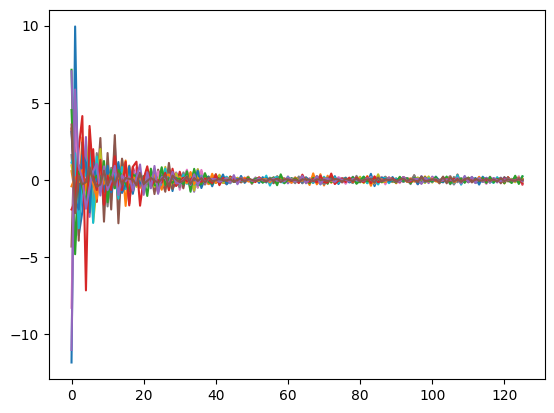

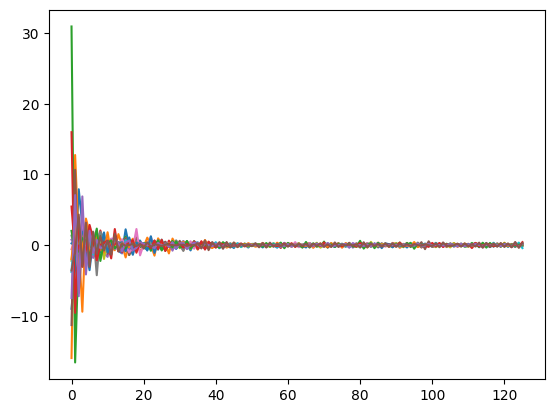

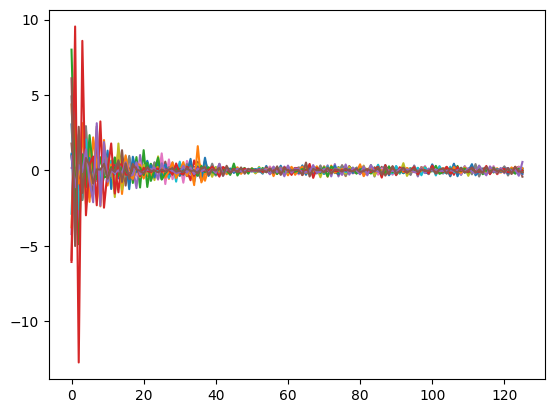

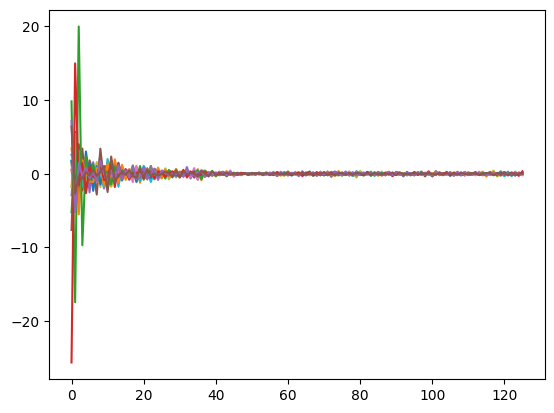

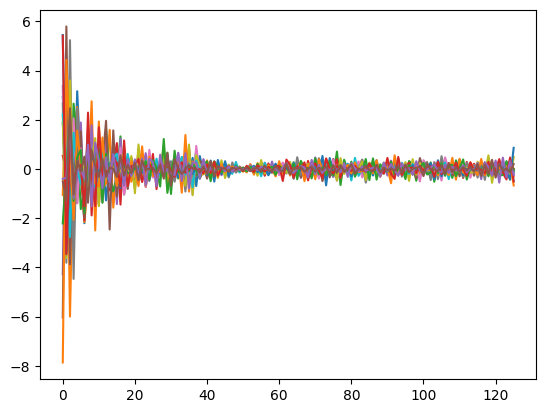

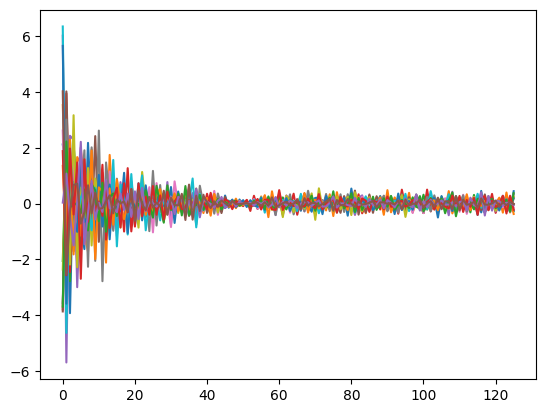

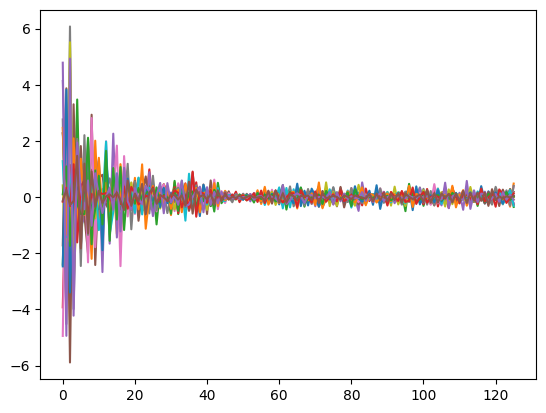

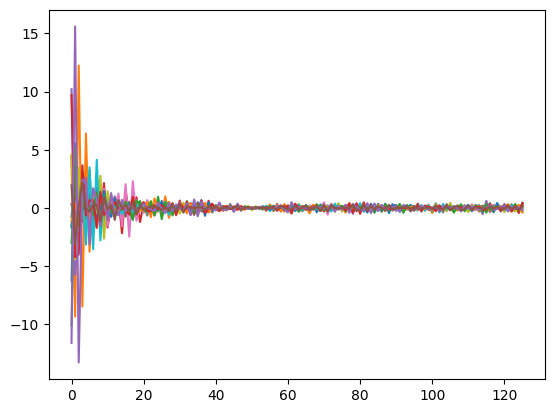

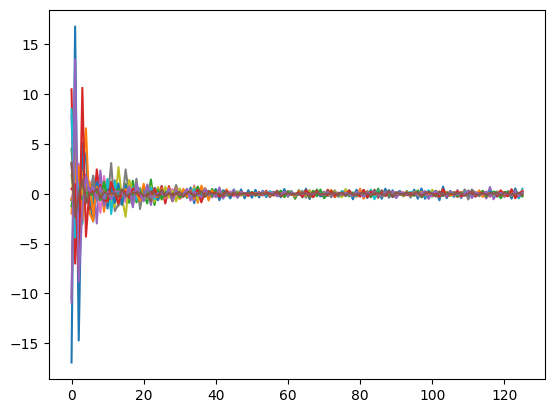

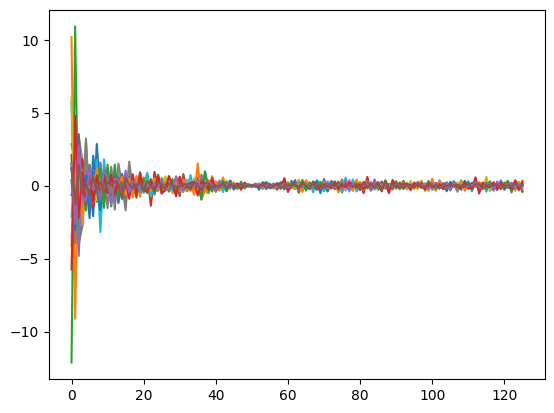

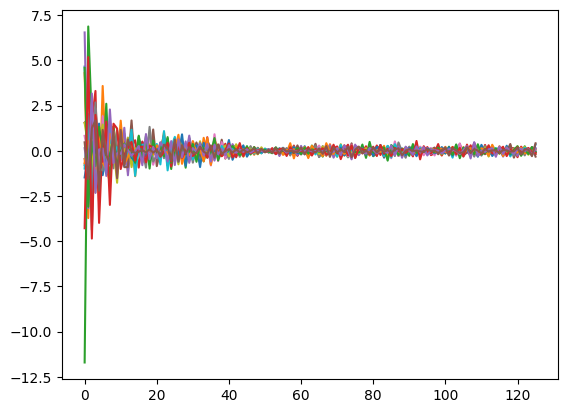

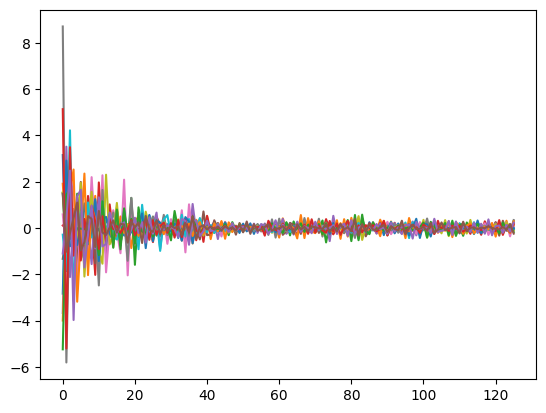

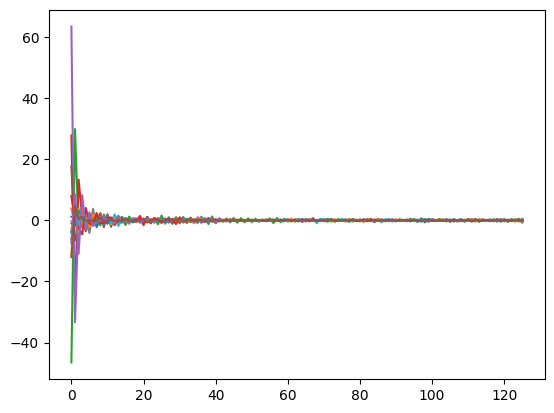

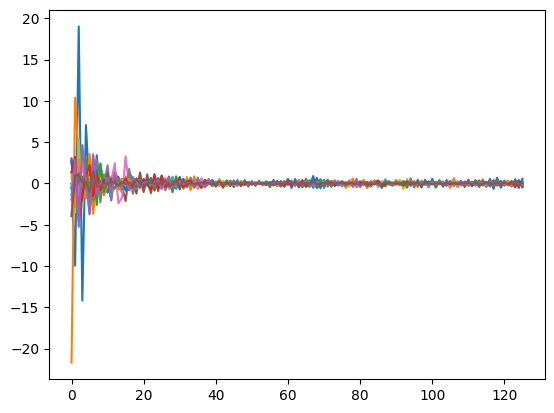

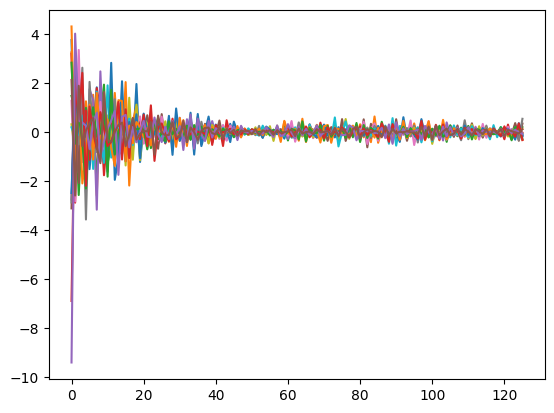

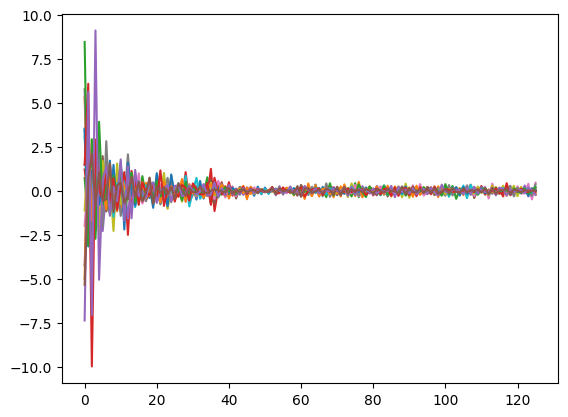

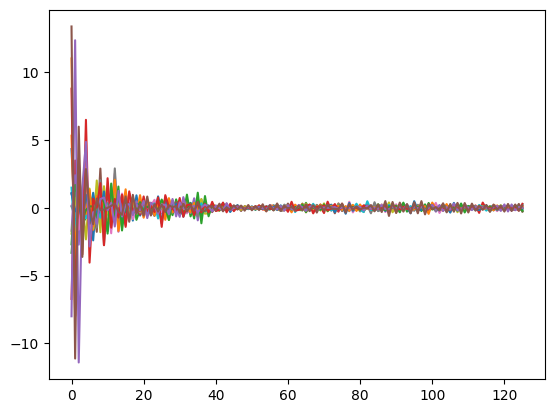

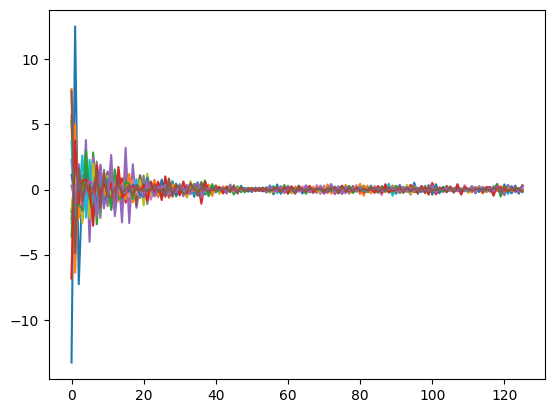

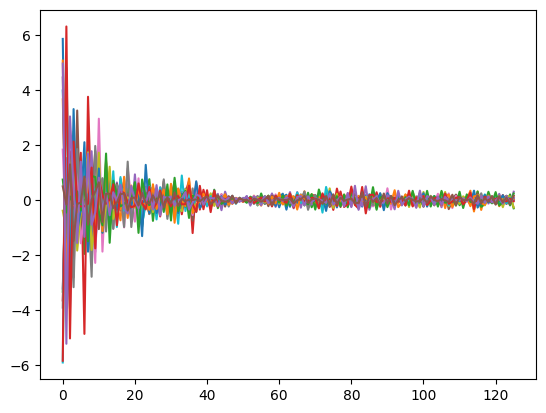

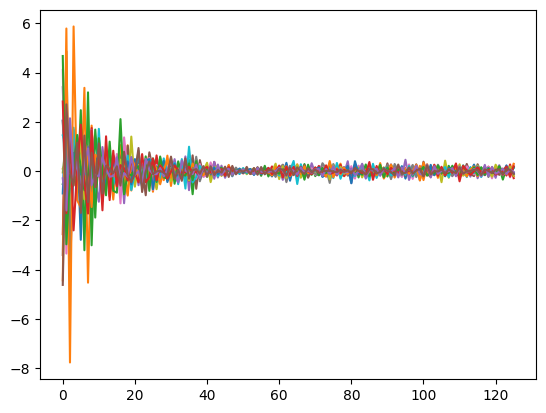

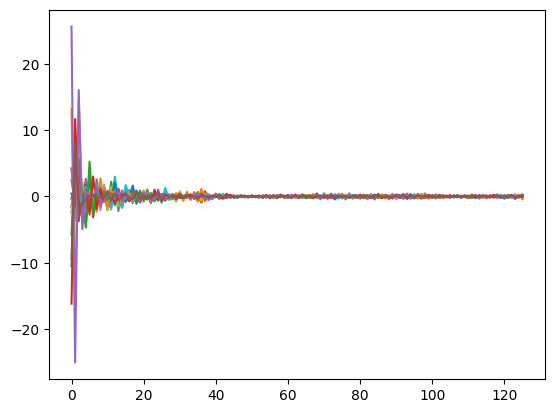

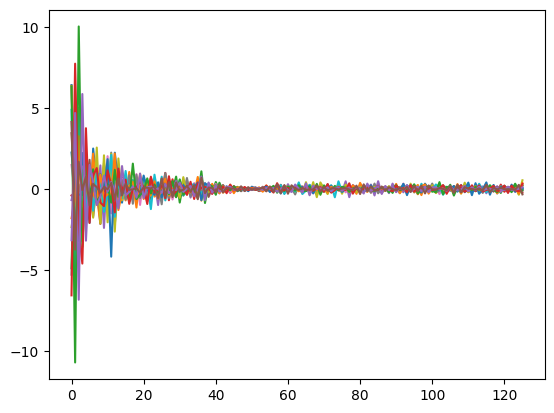

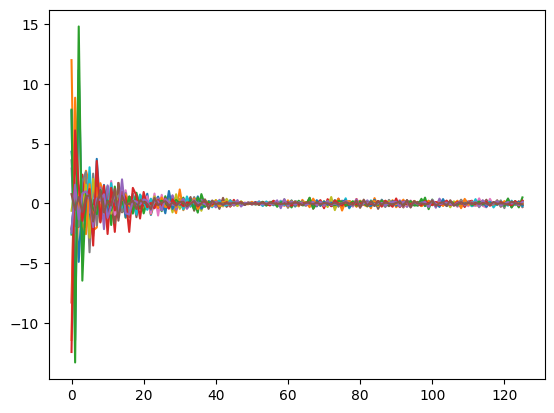

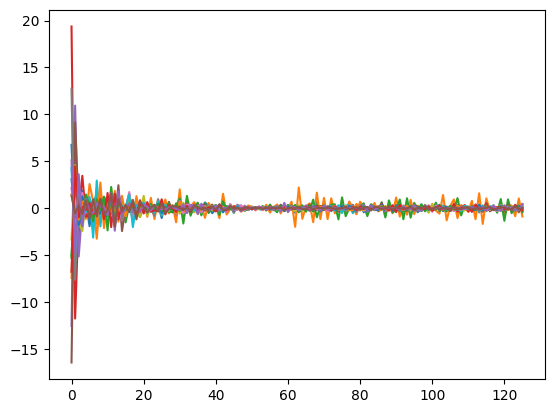

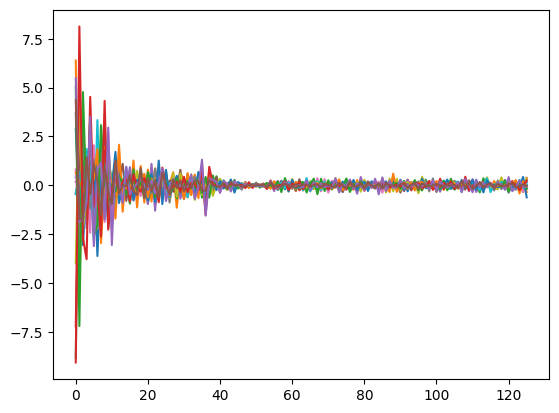

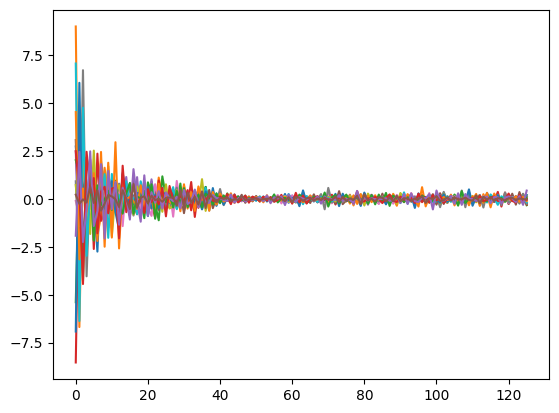

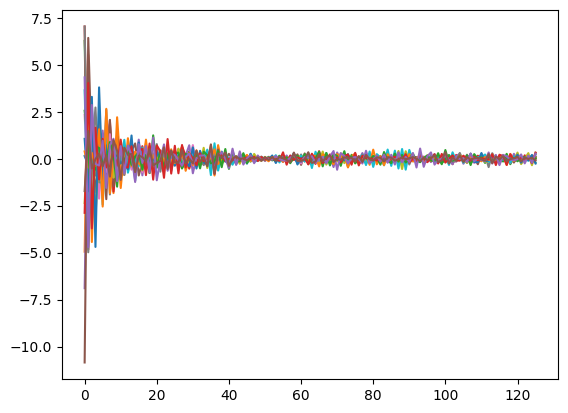

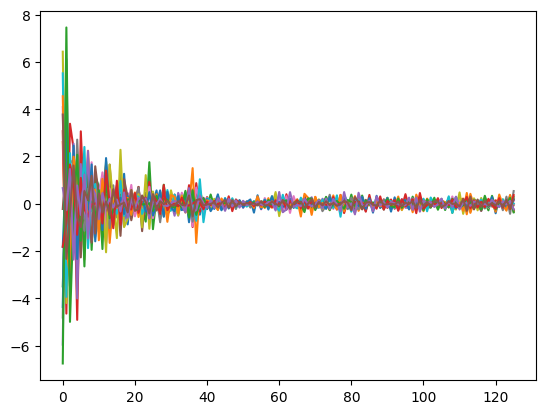

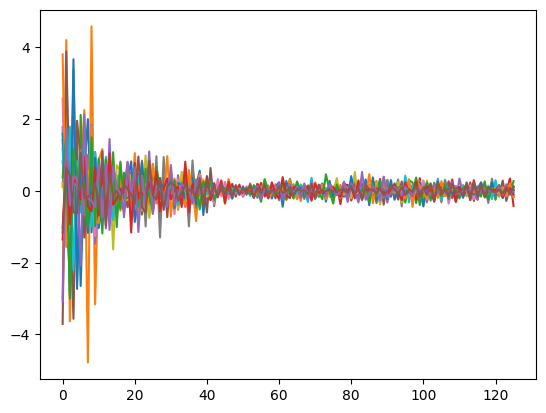

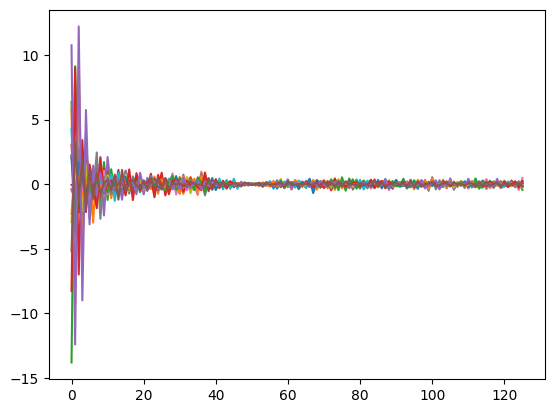

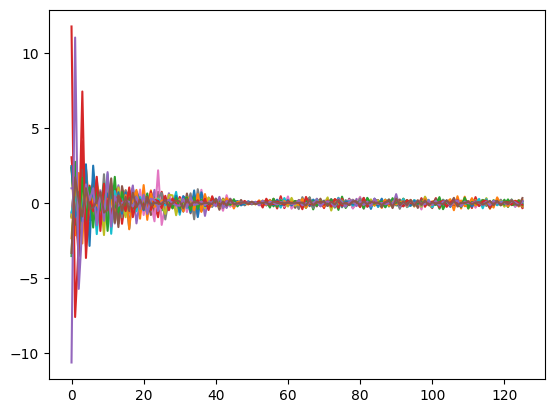

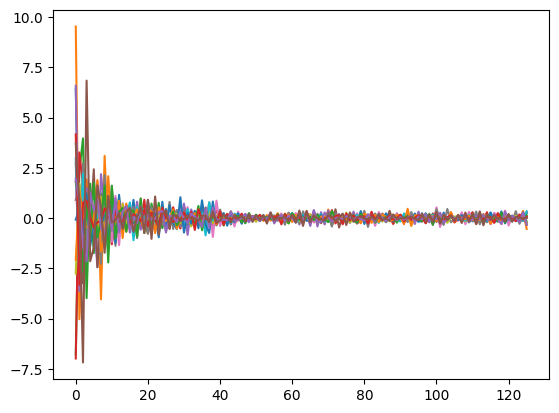

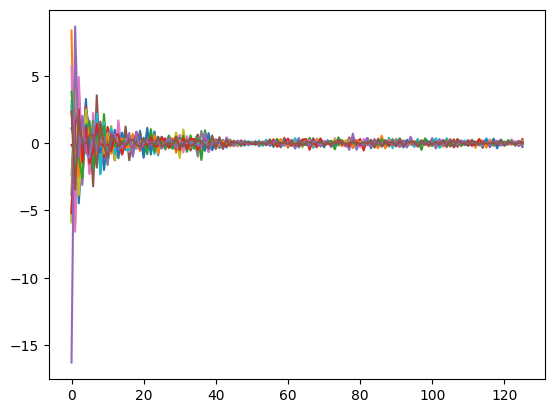

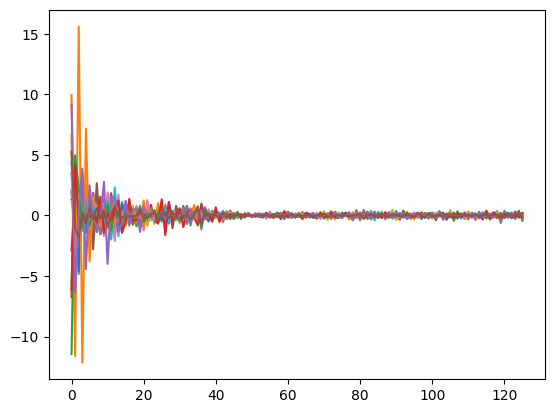

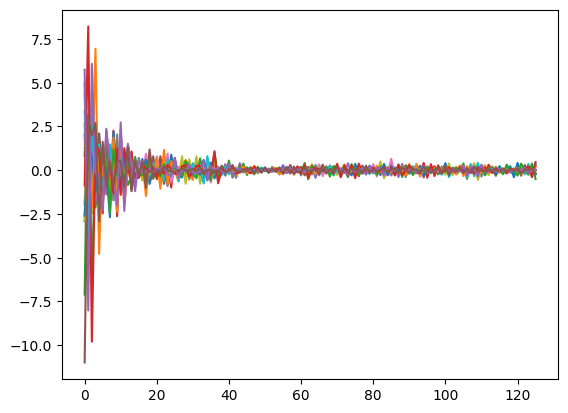

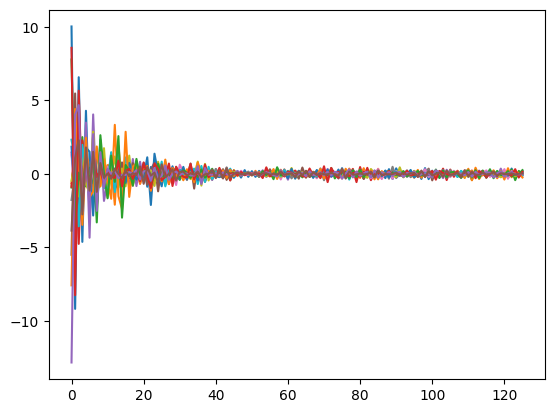

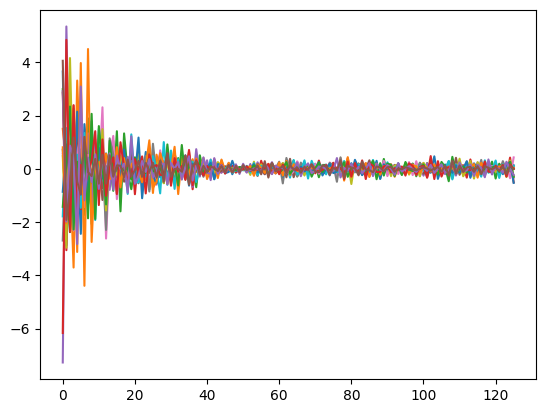

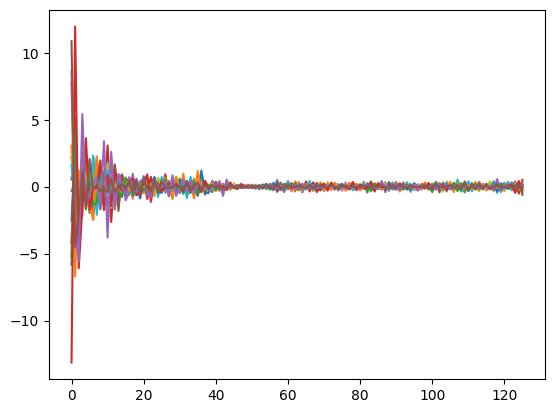

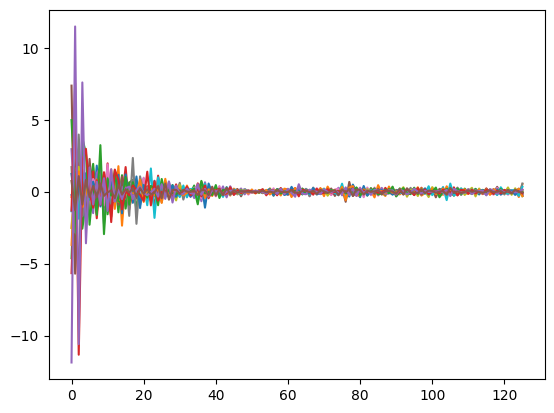

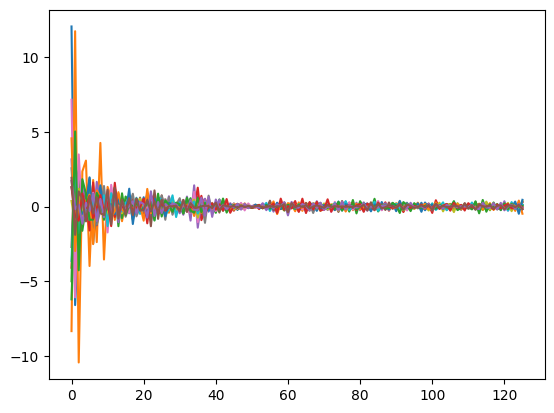

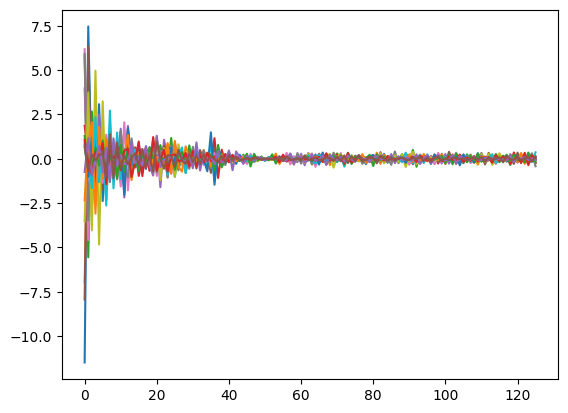

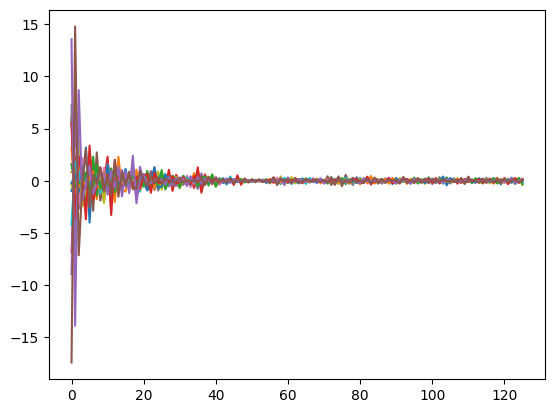

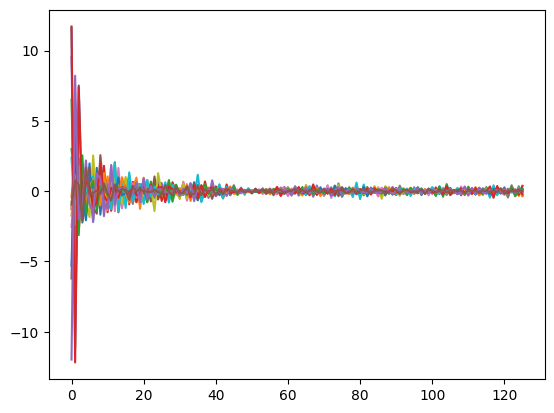

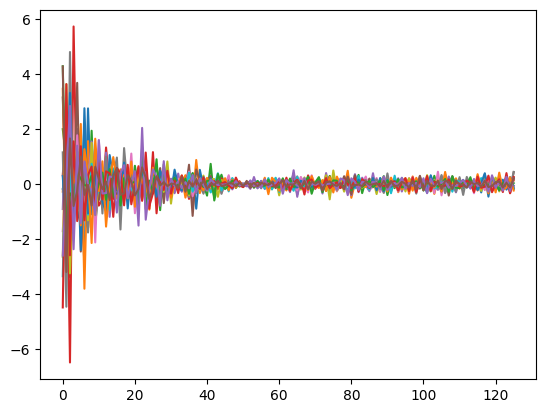

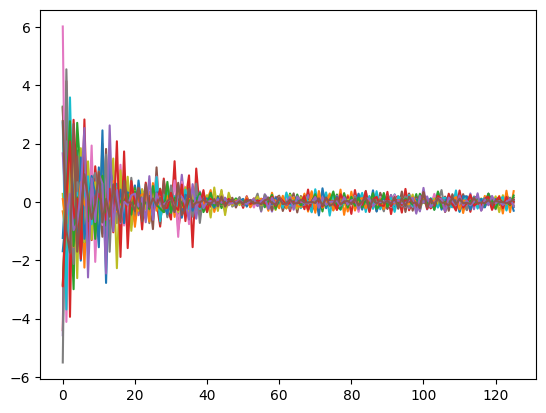

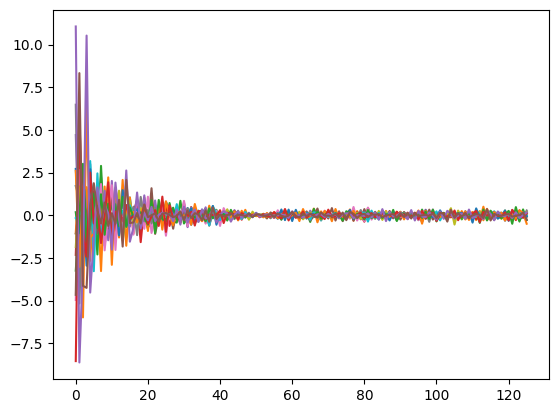

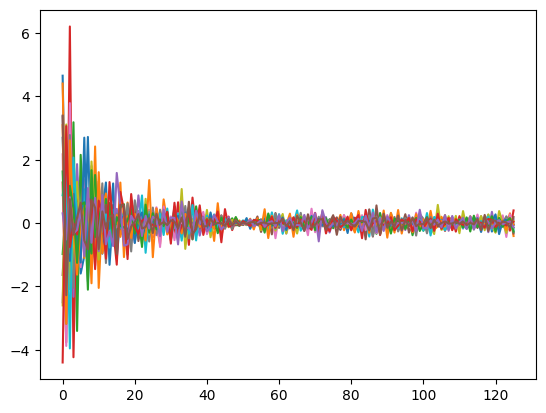

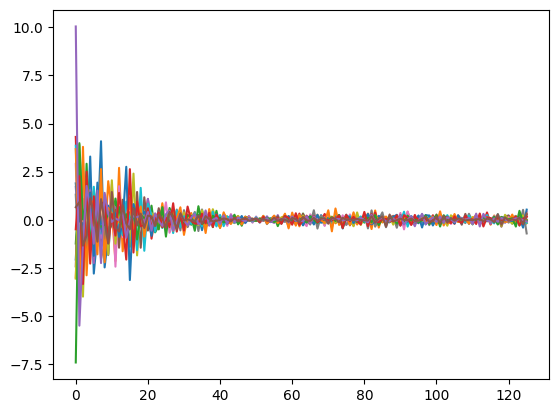

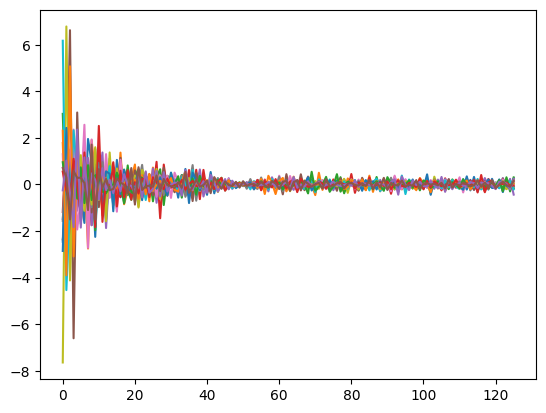

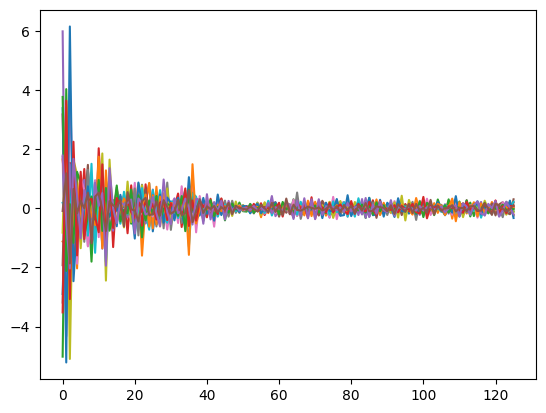

KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt


for sample in samples0:
    plt.plot(sample[0][0].cpu())
    plt.show()

for signal in generated_signal0[0]:
    plt.plot(signal)
    plt.show()


for x in train_x0:
    plt.plot(x[0])
    plt.show()
    
generated_signal0

In [8]:
samples0.shape

torch.Size([1, 1, 44, 129, 16])

In [65]:
def return_to_signal(sample):
    generated_signal = []
    for i in range(sample.shape[0]): # batch 
        sliced_sample = sample[i][0]
        temp = []
        generated_stft_real = sliced_sample[:22].cpu().numpy() # real stft channel
        generated_stft_imag = sliced_sample[22:].cpu().numpy() # imaginary stft channel
        temp_stft_imag = np.empty_like(generated_stft_imag, dtype=np.complex64)
        for idx, imag in enumerate(generated_stft_imag): 
            for idx2, imag2 in enumerate(imag):
                for idx3, imag3 in enumerate(imag2):
                    temp_stft_imag[idx][idx2][idx3] = complex(0, imag3)
        generated_stft = np.add(generated_stft_real, generated_stft_imag)
        t, sig = scipy.signal.istft(generated_stft, fs=250)
        temp.append(sig[:1875])
    generated_signal.append(temp)
    return generated_signal

In [66]:
generated_signal0 = return_to_signal(samples0)

[ 6.44444338 -8.83172391  1.43518554 ... -4.45540556 -3.84643335
 -4.2235574 ]


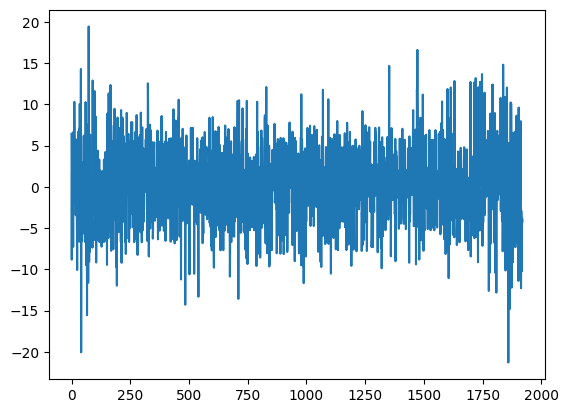

[-3.38776424 -0.54109708  2.2220879  ... -2.95950813  4.27098935
 -2.7780505 ]


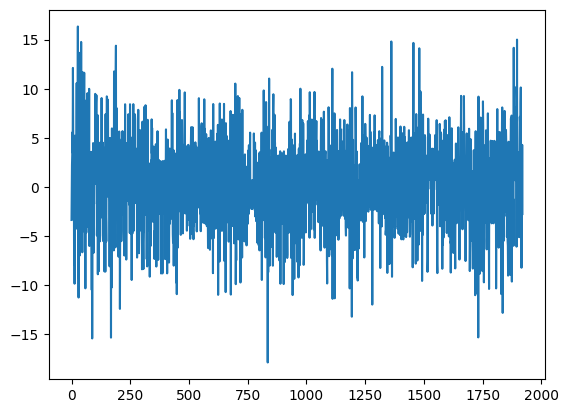

[ -1.86901902   7.77060414 -10.51897783 ...   7.03764095  -7.77004381
  -0.54323259]


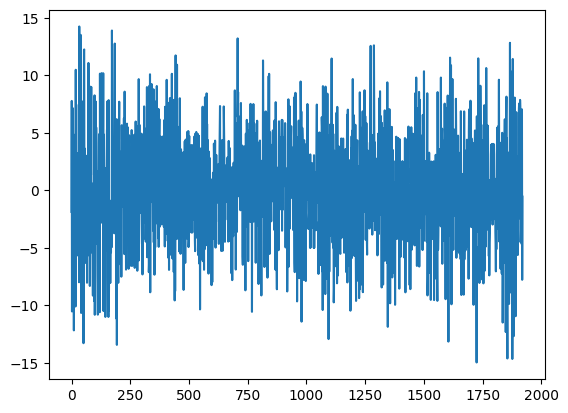

[-1.58879711  1.50144174  0.21999082 ... -0.29759703 10.29490784
 -5.09819934]


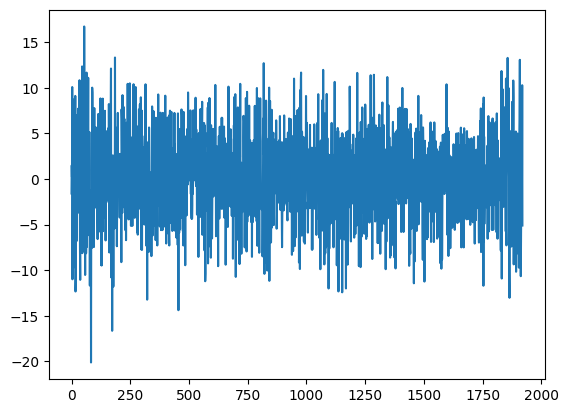

[-11.92995414   0.29015789  -2.30084391 ...   3.00498987   1.87501759
  -0.838381  ]


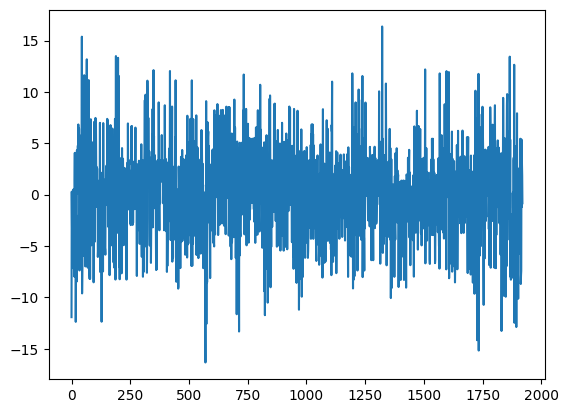

[-1.99094824 -3.07486903  4.63416323 ... -7.61759622  3.81231712
  0.64152876]


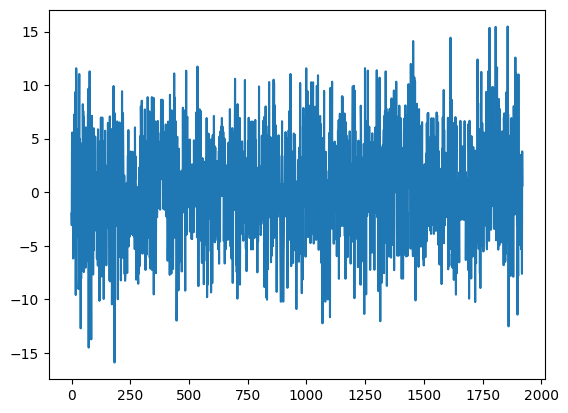

[-0.06055419 -0.10702544  0.0509114  ...  0.5571226   5.84172719
 -5.54631147]


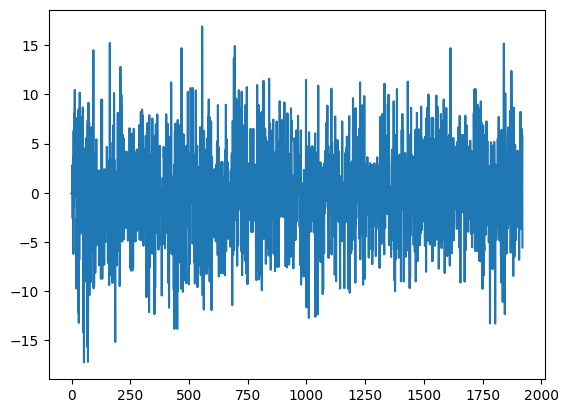

[ 1.26540894 -8.90747525  3.65577364 ... -1.94687182  4.09474885
 -0.73557913]


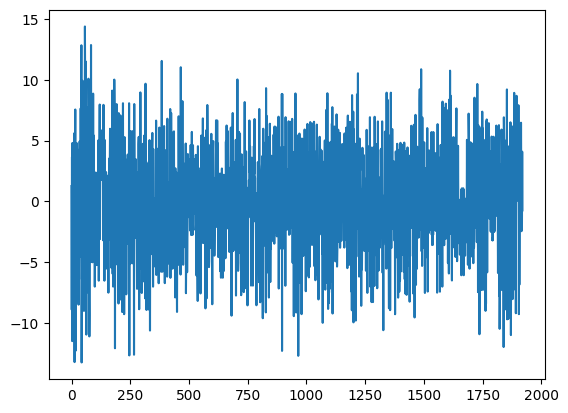

[ 5.7491827   2.46993373  2.38622335 ...  7.30453969  2.41906334
 -1.53990414]


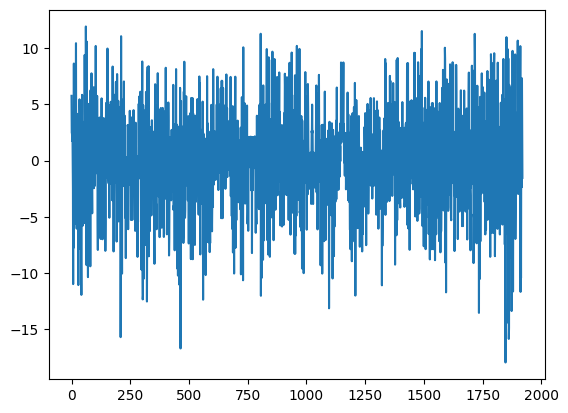

[ 0.86272062 13.64560562  2.99171985 ... -2.77839338  1.25371461
  4.85926409]


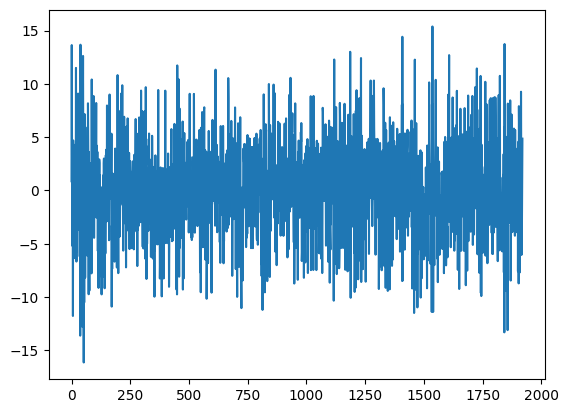

[-3.5582832   0.41342569 -2.77378179 ... 11.1739717  -1.58915215
  2.8522443 ]


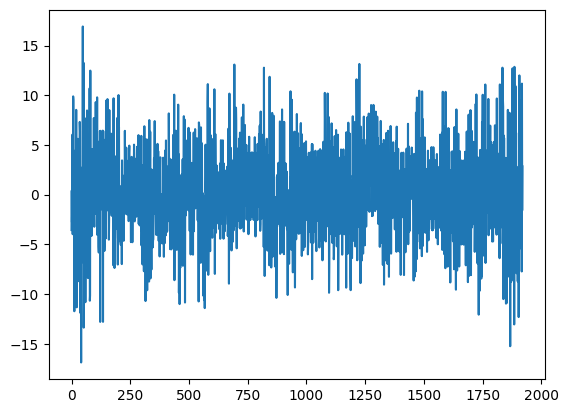

[-9.89608831  1.55350284  8.41768979 ...  3.42457942 -0.35537062
 -4.44624277]


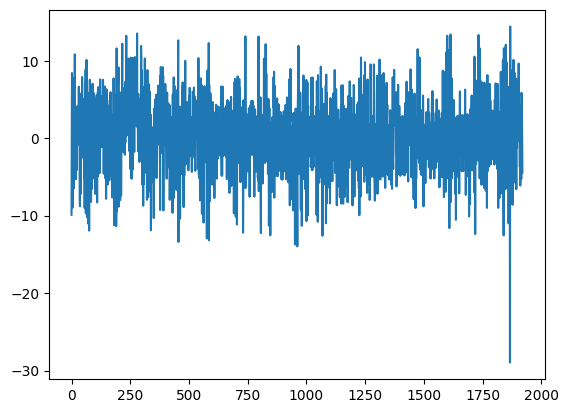

[ 4.23147753  3.6575042  -1.37340553 ... -1.03613492 -0.07681325
 -3.67135682]


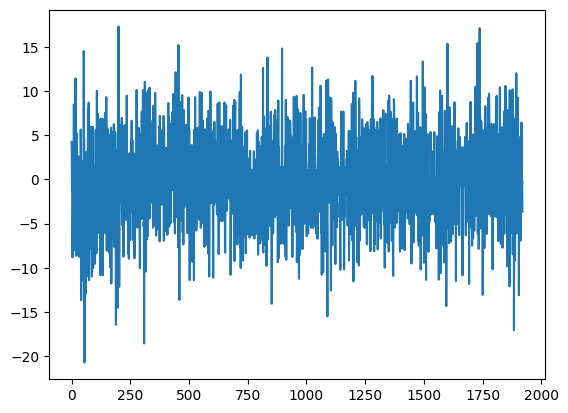

[-4.13995909 -0.53230025 -3.62533127 ... -3.72744061 -0.57616063
  3.64296202]


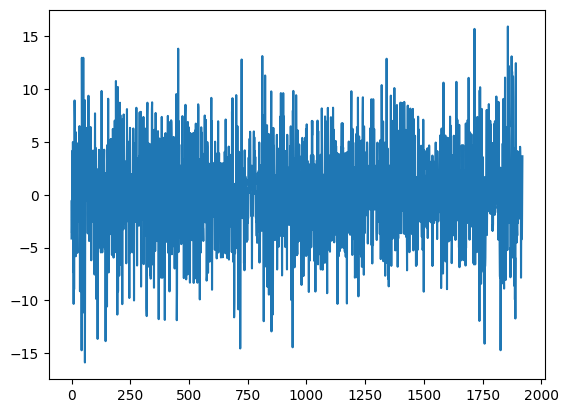

[-7.64022441  0.7207336  -5.17643126 ... -1.652027    0.63130027
 -6.67916996]


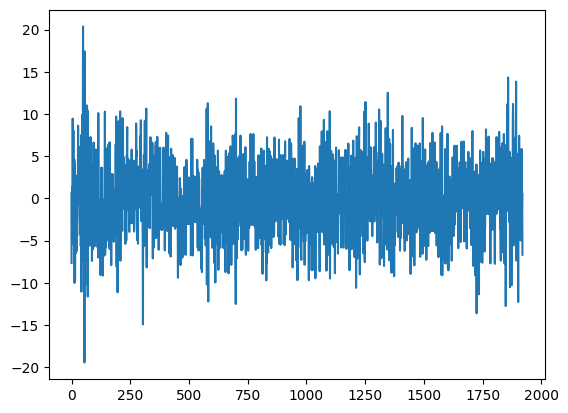

[ 6.0555903  -1.21061611  2.15869089 ...  7.05979444 -4.28691922
  1.06625682]


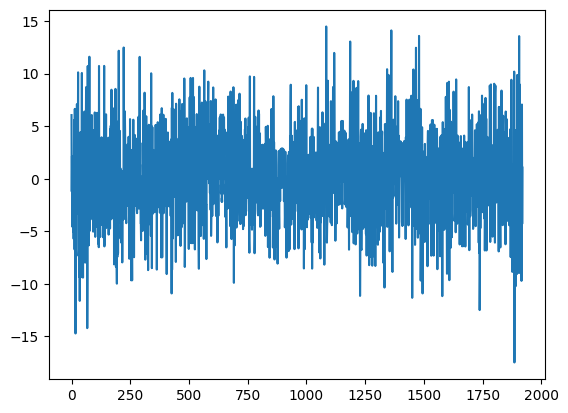

[-10.857622     2.7340293   -3.9724393  ...  -0.67565457  -3.23032958
   2.86571892]


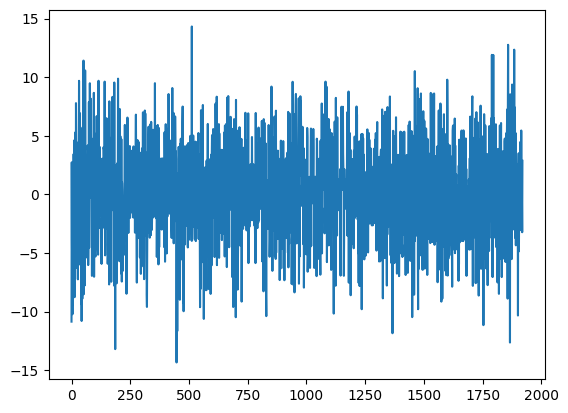

[  9.74036694  -6.1278307   -0.69730561 ...   2.66478918 -10.36227529
   4.93996074]


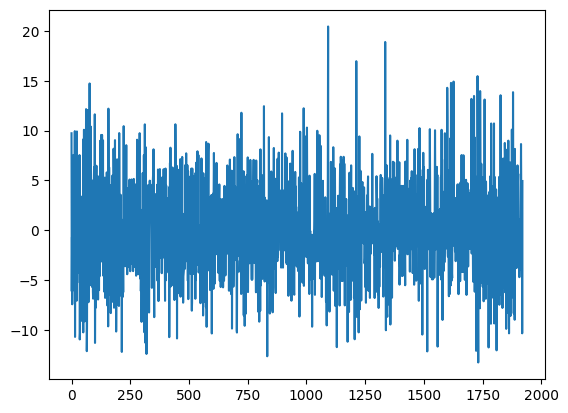

[ 6.28084002 -2.17851749  8.15190163 ... -8.77109104  7.92978987
 -2.54140146]


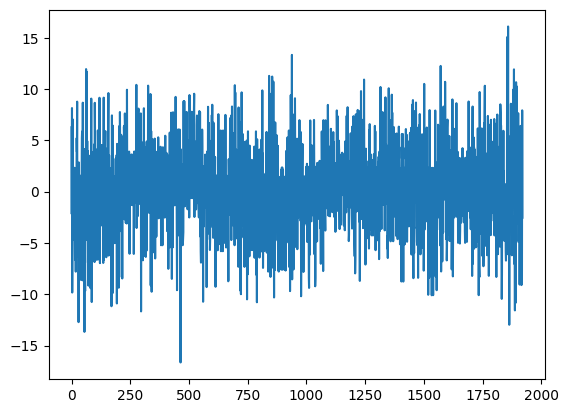

[ 8.85447202  1.80847534  1.70281919 ... -6.59951237  5.74984835
 -3.36286331]


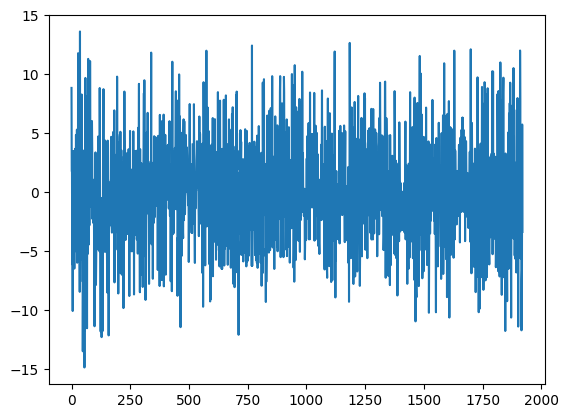

[-14.97353655  -4.7633851    4.09779255 ...  -0.59045152  -0.158379
   1.79455085]


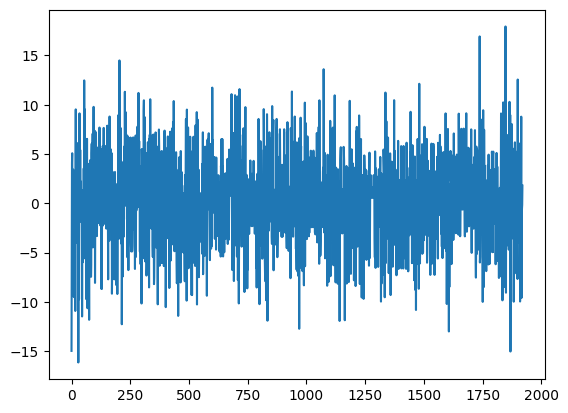

[ 5.31648386 -8.62927366 -4.00879683 ... -3.4015592   6.70315397
 -3.42906847]


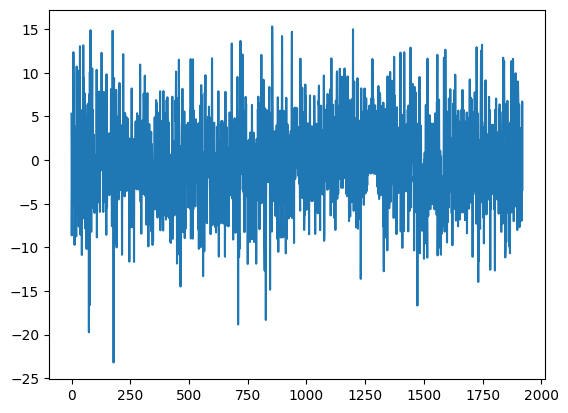